In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning Models
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [2]:
hotel_df = pd.read_csv('hotel_bookings.csv')
len(hotel_df.columns)

32

In [3]:
hotel_df.shape

(119390, 32)

In [4]:
description = ['Categorical','Target Variable(Numerical)','Numerical','Numerical','Categorical',
               'Numerical','Numerical','Numerical','Numerical','Numerical','Numerical','Numerical',
               'Categorical','Categorical','Categorical','Categorical',
               'Numerical','Numerical','Numerical','Categorical','Categorical','Numerical','Categorical','Numerical',
               'Numerical','Numerical','Categorical','Numerical','Numerical','Numerical','Categorical','Categorical']
description

['Categorical',
 'Target Variable(Numerical)',
 'Numerical',
 'Numerical',
 'Categorical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Categorical',
 'Categorical',
 'Numerical',
 'Categorical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Categorical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Categorical',
 'Categorical']

In [5]:
pd.DataFrame({'Columns': hotel_df.columns,'Data Type' : hotel_df.dtypes,'Description': description})


,Columns,Data Type,Description
hotel,hotel,object,Categorical
is_canceled,is_canceled,int64,Target Variable(Numerical)
lead_time,lead_time,int64,Numerical
arrival_date_year,arrival_date_year,int64,Numerical
arrival_date_month,arrival_date_month,object,Categorical
arrival_date_week_number,arrival_date_week_number,int64,Numerical
arrival_date_day_of_month,arrival_date_day_of_month,int64,Numerical
stays_in_weekend_nights,stays_in_weekend_nights,int64,Numerical
stays_in_week_nights,stays_in_week_nights,int64,Numerical
adults,adults,int64,Numerical


In [6]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


##  Finding missing values and cleaning data

In [8]:
a = hotel_df.isnull().sum()
t = hotel_df.shape[0]

In [9]:
data_miss = pd.DataFrame([a,a/t]).T
data_miss.columns = ['No. of Missing Data', '% Missing Data']
data_miss

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


In [10]:
#13% of the agent and 94% of the company information is information we can directly removes those twi variables from our data.
hotel_df.drop(['agent','company'],axis=1,inplace=True)

In [11]:
hotel_df['children'].value_counts() # Most bookings had no children so we will fill missing values as 0

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [12]:
hotel_df['children'].fillna(0,inplace = True)

In [13]:
hotel_df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [14]:
b = hotel_df['country'].value_counts()

In [15]:
htl_country_data = pd.DataFrame([b,b*100/t]).T

In [16]:
htl_country_data.columns = ['Count', '% Distribution']
htl_country_data

,Count,% Distribution
PRT,48590.0,40.698551
GBR,12129.0,10.159142
FRA,10415.0,8.723511
ESP,8568.0,7.176480
DEU,7287.0,6.103526
...,...,...
FJI,1.0,0.000838
UMI,1.0,0.000838
AIA,1.0,0.000838
PYF,1.0,0.000838


In [17]:
#40% of the bookings are from Portugal. and only 0.4 % is missing data. we will fill missing countries with portugal since that wont
# effect the distribution.
hotel_df['country'].fillna('PRT',inplace=True)

In [18]:
#check if missing data is handled
htl_missing_data = pd.DataFrame([hotel_df.isnull().sum(),hotel_df.isnull().sum()*100.0/hotel_df.shape[0]]).T
htl_missing_data.columns = ['No. of Missing Data', '% Missing Data']
htl_missing_data


,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


## Data Visualisation

**lets check the distribution of all the variables with hotel booking cancellation**

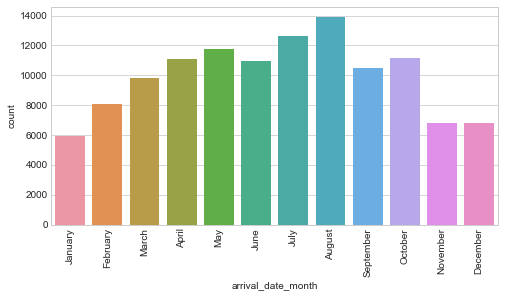

In [19]:
#Highest booking monthwise
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(8,4))
sns.countplot(hotel_df['arrival_date_month'],order = month_sorted)
plt.xticks(rotation = 90)
plt.show()
# as we see july and august has highest demand while winters has lowest demand.

Text(0.5, 1.0, 'Unbalanced Dataset')

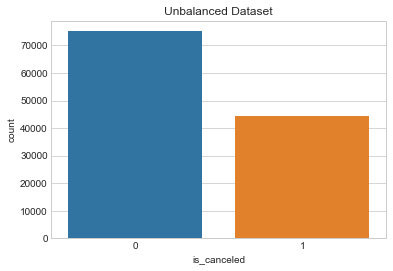

In [20]:
sns.countplot(x="is_canceled", data=hotel_df).set_title("Unbalanced Dataset")

Text(0.5, 1.0, 'Balanced Dataset')

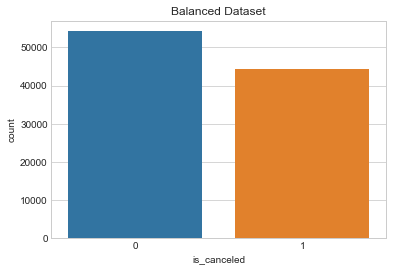

In [21]:
from sklearn.utils import resample
not_default = hotel_df[hotel_df.is_canceled==0]
default = hotel_df[hotel_df.is_canceled==1]

 

# upsample minority
resampled = resample(not_default,
                          replace=True, # sample with replacement
                          n_samples=len(default)+10000, # match number in majority class
                          random_state=27) # reproducible results

 

# combine majority and upsampled minority
#upsampled = pd.concat([not_fraud, fraud_upsampled])
hotel_df = pd.concat([resampled,default],ignore_index=True)
sns.countplot(x="is_canceled", data=hotel_df).set_title("Balanced Dataset")

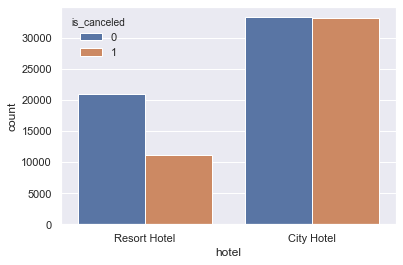

In [22]:
#Booking Cancelled on hotel basis
sns.set(style="darkgrid")
ax = sns.countplot(x="hotel", data=hotel_df,hue='is_canceled')

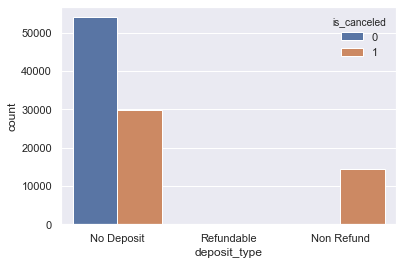

In [23]:
#Deposit Type and cancellation status
ax = sns.countplot(x="deposit_type", data=hotel_df,hue='is_canceled')

In [24]:
#Date of cancellation vs Date of Arrival
# here we are creating new column by combining arrival year, month and day.similarly, we will do for cancellation date
hotel_df['arrival_date'] = hotel_df['arrival_date_year'].astype(str) + '-' + hotel_df['arrival_date_month'] + '-' + hotel_df['arrival_date_day_of_month'].astype(str)
hotel_df['arrival_date'] = hotel_df['arrival_date'].apply(pd.to_datetime)
hotel_df['reservation_status_date'] = hotel_df['reservation_status_date'].apply(pd.to_datetime)

In [25]:
cancelled_data = hotel_df[hotel_df['reservation_status'] == 'Canceled']
cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days

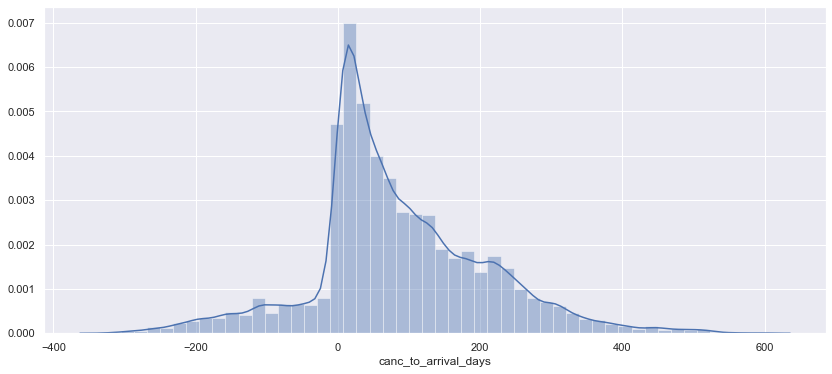

In [26]:
plt.figure(figsize=(14,6))
sns.distplot(cancelled_data['canc_to_arrival_days'])
plt.show()

In [27]:
print('Percentage of cancellations that are within a week of arrival: ', 
      (cancelled_data[cancelled_data['canc_to_arrival_days']<=7]['canc_to_arrival_days'].count()*100/cancelled_data['canc_to_arrival_days'].count()).round(2), '%')

Percentage of cancellations that are within a week of arrival:  20.65 %


In [28]:
#20% of the cancellation happen in a week so there will be huge benefit if we predict if a customer will cancel a booking or not
# so that hotel can prepare for it.

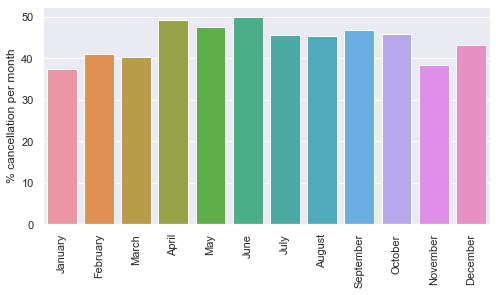

In [29]:
monthly_canc = pd.DataFrame(hotel_df[hotel_df['is_canceled'] == 1]['arrival_date_month'].value_counts() * 100 / hotel_df['arrival_date_month'].value_counts())
monthly_canc.reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x=monthly_canc.index,y='arrival_date_month',data=monthly_canc, order=month_sorted)
plt.xticks(rotation = 90)
plt.ylabel('% cancellation per month')
plt.show()

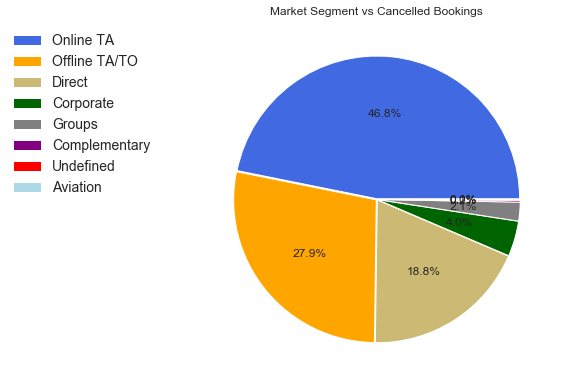

In [30]:
# market segment and cancellation
plt.figure(figsize=(8,8))
explode = [0.005] * len(cancelled_data['market_segment'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['market_segment'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()

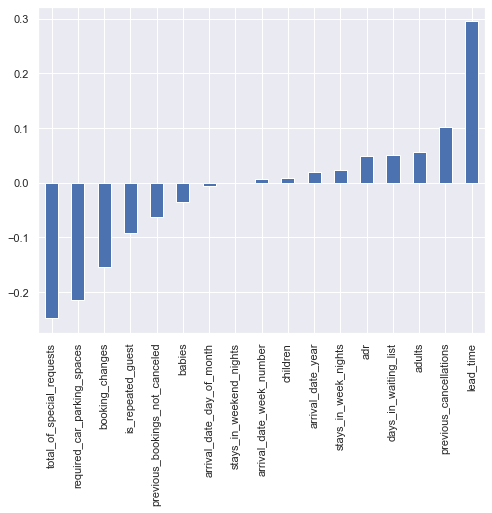

In [31]:
plt.figure(figsize=(8,6))
hotel_df.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()


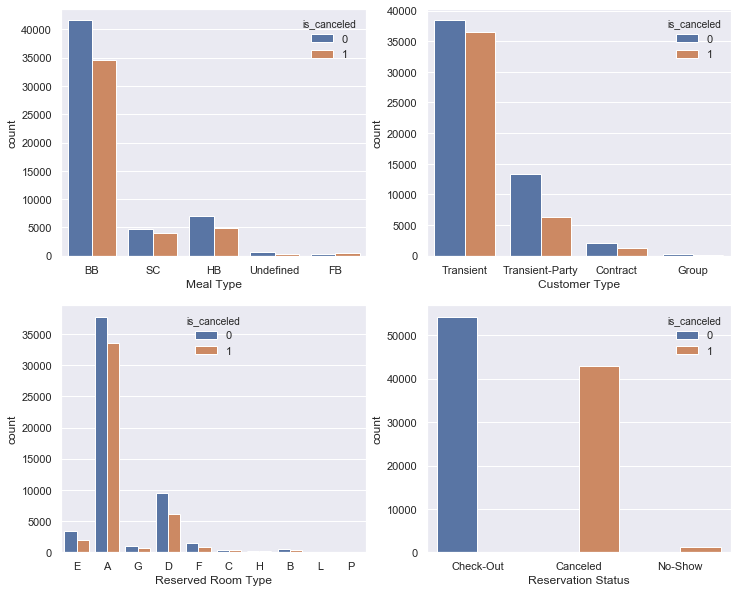

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.countplot(hotel_df['meal'], hue=hotel_df['is_canceled'])
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(hotel_df['customer_type'], hue=hotel_df['is_canceled'])
plt.xlabel('Customer Type')
plt.subplot(223)
sns.countplot(hotel_df['reserved_room_type'], hue=hotel_df['is_canceled'])
plt.xlabel('Reserved Room Type')
plt.subplot(224)
sns.countplot(hotel_df['reservation_status'], hue=hotel_df['is_canceled'])
plt.xlabel('Reservation Status')
plt.show()

In [33]:
# convert to dummy variables
hotel_df = hotel_df.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date','arrival_date'], axis=1)

In [34]:
hotel_df = pd.concat([hotel_df, 
                 pd.get_dummies(hotel_df['hotel'], drop_first=True), 
                 pd.get_dummies(hotel_df['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(hotel_df['market_segment'], drop_first=True),
                 pd.get_dummies(hotel_df['distribution_channel'], drop_first=True),
                 pd.get_dummies(hotel_df['customer_type'], drop_first=True)
                 ], axis=1)
hotel_df = hotel_df.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

In [35]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98448 entries, 0 to 98447
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     98448 non-null  int64  
 1   lead_time                       98448 non-null  int64  
 2   arrival_date_year               98448 non-null  int64  
 3   arrival_date_week_number        98448 non-null  int64  
 4   arrival_date_day_of_month       98448 non-null  int64  
 5   stays_in_weekend_nights         98448 non-null  int64  
 6   stays_in_week_nights            98448 non-null  int64  
 7   adults                          98448 non-null  int64  
 8   children                        98448 non-null  float64
 9   babies                          98448 non-null  int64  
 10  is_repeated_guest               98448 non-null  int64  
 11  previous_cancellations          98448 non-null  int64  
 12  previous_bookings_not_canceled  

# DATA MODELING

In [36]:
X = hotel_df.iloc[:, 1:].values
y = hotel_df.iloc[:, 0].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [38]:
X_test.shape

(24612, 43)

In [39]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
 # Empty dictionary of model accuracy results
model_accuracy_results = {}

# Function for calculating accuracy from confusion matrix
from sklearn.metrics import confusion_matrix
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

#### KNN Classifier

In [41]:
# Fit and train
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['KNearestNeighbors'] = model_accuracy(y_test, y_pred)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11839,  1687],
       [ 3154,  7932]], dtype=int64)

#### Random Forest Classifier

In [43]:
# Fit and train
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['RandomForest'] = model_accuracy(y_test, y_pred)

In [44]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
KNearestNeighbors,80.33
RandomForest,86.44


# Tuning the parameters

In [45]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini']}]
randomforestclassifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = randomforestclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [46]:
print('Best Score: ', grid_search.best_score_.round(2))
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.87
Best Parameters:  {'criterion': 'gini', 'n_estimators': 500}


In [47]:
# Fit and train
optimized_classifier = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
optimized_classifier.fit(X_train,y_train)

# Predict
y_pred = optimized_classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['OptimizedRandomForest'] = model_accuracy(y_test, y_pred)

In [48]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
KNearestNeighbors,80.33
RandomForest,86.44
OptimizedRandomForest,87.58


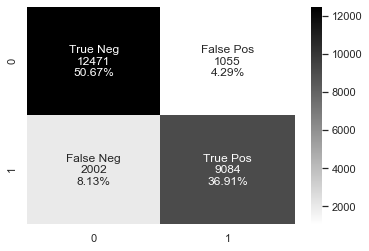

In [49]:
orf_cm = confusion_matrix(y_test, optimized_classifier.predict(X_test))

names = ['True Neg','False Pos','False Neg','True Pos'] # list of descriptions for each group
values = [value for value in orf_cm.flatten()] # list of values for each group
percentages = [str(perc.round(2))+'%' for perc in orf_cm.flatten()*100/np.sum(orf_cm)] # list of percentages for each group
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,values,percentages)] # zip them into list of strings as labels
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(orf_cm, annot=labels, fmt='', cmap='binary')